In [1]:
import os 
import scipy.io 
import matplotlib.pyplot as plt 
import numpy as np
import sys 
sys.path.append("../")

from matplotlib import cm
import scienceplots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib.text import Text
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')

In [2]:
from utils import PoissonKernel1D
x = np.linspace(0,1,501)
X, Y = np.meshgrid(x,x)
Gref = PoissonKernel1D(x)

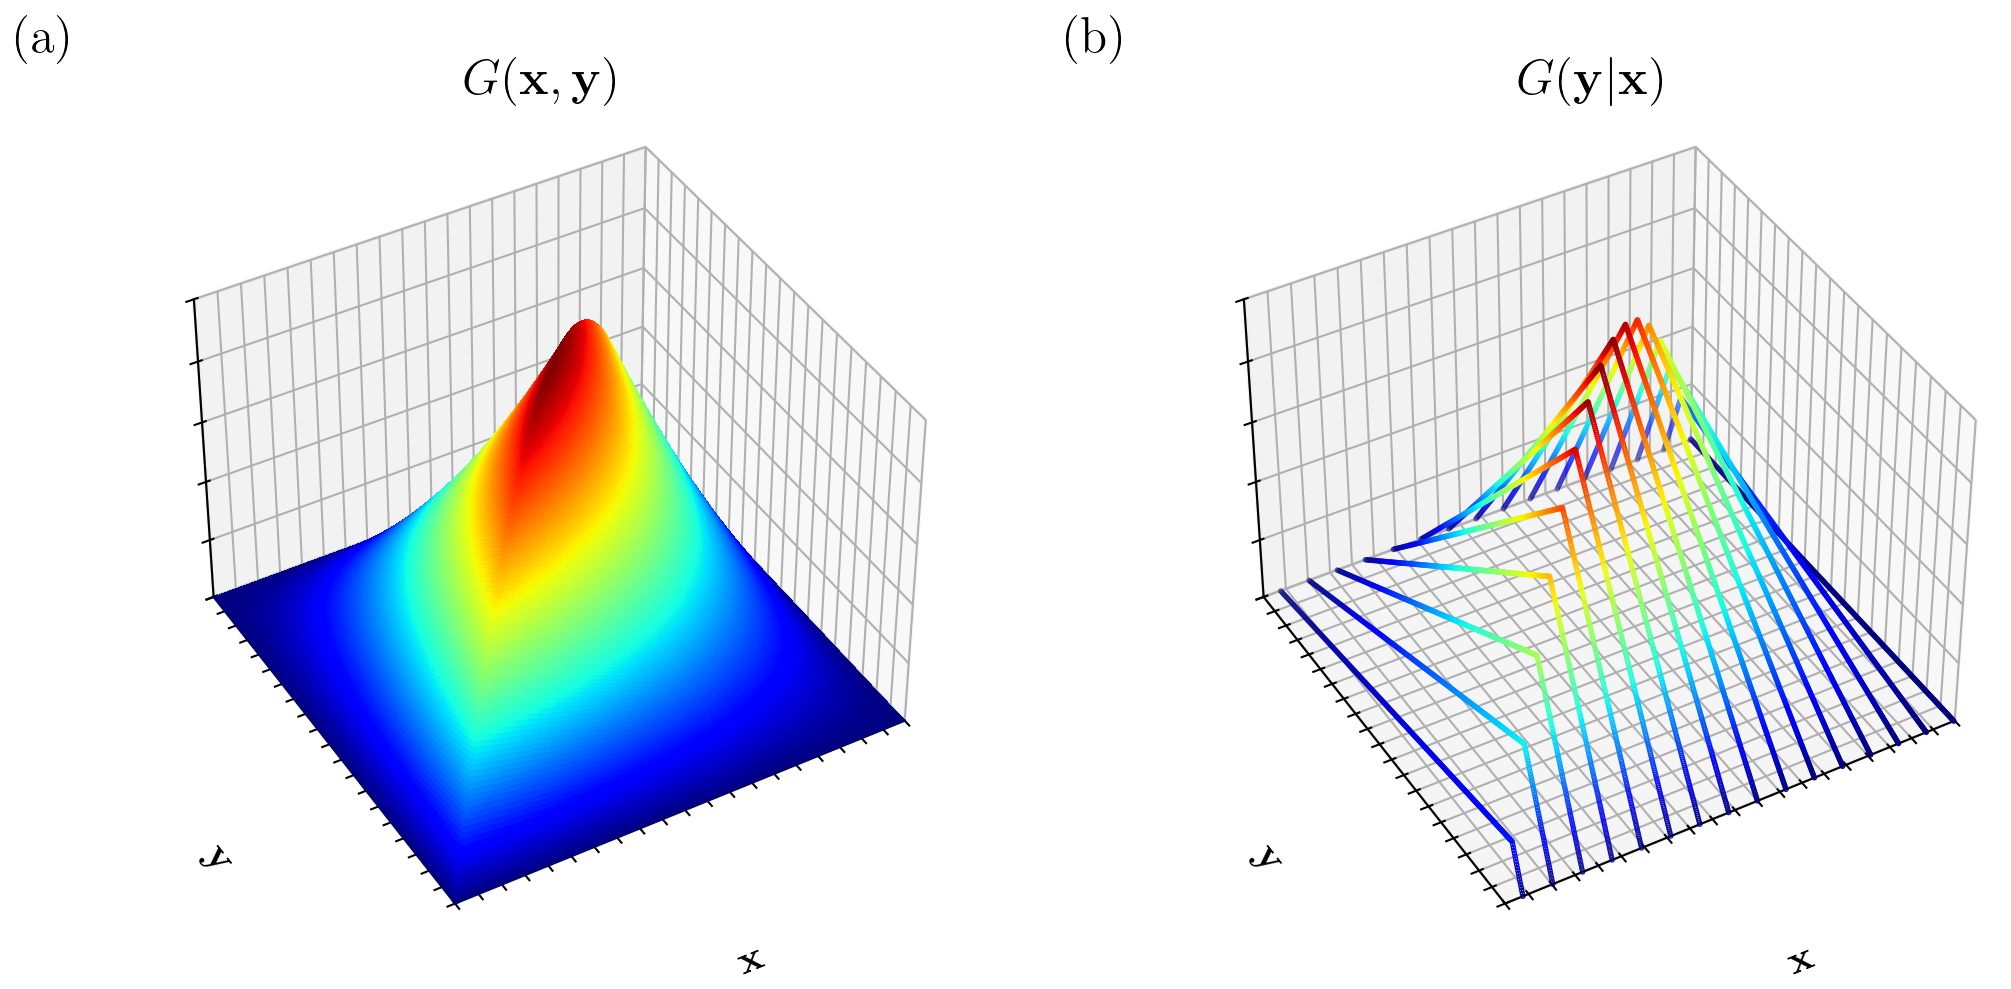

In [7]:
f = plt.figure(figsize=(7,3.5))
subfigs = f.subfigures(1,2).flatten()
ax1 = subfigs[0].add_subplot(projection='3d')
ax2 = subfigs[1].add_subplot(projection='3d')

ax1.view_init(elev=40., azim=60, roll=0)
ax2.view_init(elev=40., azim=60, roll=0)

ax1.set(xlim=[0, 1], ylim=[0, 1], zlim=[0, 0.25])
ax2.set(xlim=[0, 1], ylim=[0, 1], zlim=[0, 0.25])

surf = ax1.plot_surface(X, Y, Gref, cmap=cm.jet, rstride = 2, cstride = 2, antialiased=False, zorder=1)
ax1.zaxis.set_major_formatter('{x:.02f}')

ax1.set(
    title="$G(\mathbf{x}, \mathbf{y})$",
    xlabel='$\mathbf{x}$',
    ylabel='$\mathbf{y}$',
    xticklabels="",
    yticklabels="",
    zticklabels="")

for i in np.arange(501)[1::32]:
    ax2.scatter(X[:,i], Y[:,i], Gref[:,i], c=cm.jet(Gref[:,i]/0.25), s=0.1)
ax2.zaxis.set_major_formatter('{x:.02f}')
ax2.set(
    title="$G(\mathbf{y} | \mathbf{x})$",
    xlabel='$\mathbf{x}$',
    ylabel='$\mathbf{y}$',
    xticklabels=[],
    yticklabels=[],
    zticklabels=[])

label_a = Text(0.01, 0.98, '(a)', fontsize=12, transform=subfigs[0].transSubfigure, ha="left", va="top")
subfigs[0].add_artist(label_a)
label_b = Text(0.01, 0.98, '(b)', fontsize=12, transform=subfigs[1].transSubfigure, ha="left", va="top")
subfigs[1].add_artist(label_b)
plt.savefig('pw.pdf')